# Credit Card Fraud Detection Project with Python
<h3>PROJECT OVERVIEW</h3>

Credit card fraud is a significant issue in the financial industry. Detecting fraudulent transactions is crucial to prevent financial losses for both customers and financial institutions. Fraudulent activities can take various forms, including unauthorized transactions, identity theft, and other malicious actions.

1. Imbalanced Data: <br>
The majority of credit card transactions are legitimate, leading to imbalanced datasets where fraudulent transactions are a small percentage.
2. Adaptive Techniques: <br>
Fraudsters continuously adapt their methods, making it challenging to build a model that can keep up with evolving fraudulent patterns.
3. Real-time Processing: <br>
Credit card fraud detection systems need to operate in real-time to quickly identify and prevent fraudulent transactions.

Import the important libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

Load the Dataset to be used for Analysis and Model Creation

In [2]:
df= pd.read_csv("data/credit_card.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [11]:
pd.set_option('display.max_columns', 50)

Credit Card DataFrame = df

In [12]:
df[22:23]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22,18.0,1.166616,0.50212,-0.0673,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,0.922175,0.744786,-0.531377,-2.105346,1.12687,0.003075,0.424425,-0.454475,-0.098871,-0.816597,-0.307169,0.018702,-0.061972,-0.103855,-0.370415,0.6032,0.108556,-0.040521,-0.011418,2.28,0


In [9]:
np.array(df[22:23])

array([[ 1.80000000e+01,  1.16661638e+00,  5.02120088e-01,
        -6.73003144e-02,  2.26156924e+00,  4.28804195e-01,
         8.94735167e-02,  2.41146580e-01,  1.38081705e-01,
        -9.89162395e-01,  9.22174967e-01,  7.44785789e-01,
        -5.31377250e-01, -2.10534645e+00,  1.12687010e+00,
         3.07532251e-03,  4.24424506e-01, -4.54475292e-01,
        -9.88706272e-02, -8.16597307e-01, -3.07168509e-01,
         1.87018720e-02, -6.19722672e-02, -1.03854922e-01,
        -3.70415177e-01,  6.03200339e-01,  1.08555873e-01,
        -4.05207056e-02, -1.14178153e-02,  2.28000000e+00,
         0.00000000e+00]])

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<Axes: >

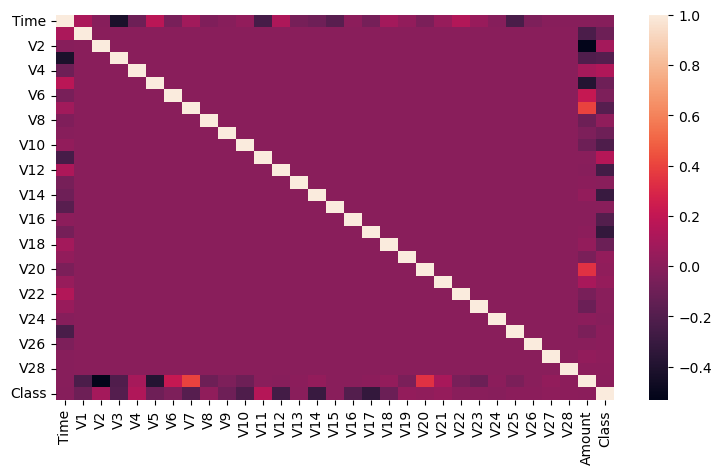

In [6]:
fig = plt.figure(figsize = (9, 5)) 
sbn.heatmap(df.corr())

In [ ]:
# sbn.pairplot(df)

<b>Data Distribution -- Legitimate OR Fraud</b> <br>
284315 Legitimate Credit Card Transactions<br>
492 Fraud Credit Card Transactions<br>

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Data separation for Analysis

In [15]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [10]:
print("Legitimate Dataset shape", legit.shape)
print("Fraud Dataset shape     ", fraud.shape)

Legitimate Dataset shape (284315, 31)
Fraud Dataset shape      (492, 31)


In [11]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Comparing the values for both Transactions

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling -- <br>
Build dataset with similar number of legitimate and fraud Transactions.<br>
Number of Fraudelant Transations = 492 <br>
Pick Equal no of random Legitimate Transations from dataset (df)

In [16]:
legit_sample = legit.sample(n=492)

In [22]:
((fraud[4:5]*100)//1)/100

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6329,7519.0,1.23,3.01,-4.31,4.73,3.62,-1.36,1.71,-0.5,-1.29,-2.45,2.1,-4.61,1.46,-6.08,-0.34,2.58,6.73,3.04,-2.73,0.0,-0.38,-0.71,-0.66,-1.64,1.48,0.56,-0.02,0.14,1.0,1.0


Concatenating and Creating new DataFrame Sample new_df

In [15]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36606,38615.0,-0.438539,0.703925,2.071171,0.902221,0.198344,1.006120,0.303972,0.230856,0.238505,...,-0.052783,0.510595,-0.313163,-0.263815,-0.013024,-0.241801,0.280413,-0.039424,1.00,0
93454,64425.0,1.557465,-0.820946,-0.181321,-1.328958,-1.171993,-1.363934,-0.476261,-0.395545,-2.125008,...,-0.177214,-0.133840,-0.076338,0.382998,0.664398,-0.082074,-0.006568,0.005840,15.00,0
2761,2300.0,-0.354728,0.966904,1.759725,-0.189578,0.185929,-0.526919,0.840484,-0.172150,-0.597873,...,-0.222657,-0.406952,-0.086201,0.326870,-0.231237,0.023491,0.102655,-0.111189,1.29,0
267910,162978.0,-0.000815,0.771628,0.464138,3.442218,2.573049,5.277124,-0.744703,1.318290,-1.557463,...,0.315736,0.933651,0.024354,0.713859,-0.982865,0.401607,0.300914,0.234049,13.00,0
189181,128291.0,-0.065335,1.105277,-0.510529,-0.593565,0.774591,-0.855645,1.082110,-0.252031,0.235357,...,0.291740,1.183954,-0.204945,-0.621305,-0.650454,-0.174268,0.618489,0.372499,9.95,0


In [17]:
new_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95812.262195,-0.041616,0.002189,-0.083439,0.018078,-0.062860,0.014727,-0.016332,0.047855,0.032701,...,-0.010155,-0.032048,-0.042568,0.021304,-0.004283,-0.013999,0.013278,0.006228,0.000098,91.037785
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting Data into Features and Target

In [20]:
x = new_df.drop(['Class'], axis=1)
y = new_df['Class']

In [21]:
x.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
36606,38615.0,-0.438539,0.703925,2.071171,0.902221,0.198344,1.006120,0.303972,0.230856,0.238505,...,0.177660,-0.052783,0.510595,-0.313163,-0.263815,-0.013024,-0.241801,0.280413,-0.039424,1.00
93454,64425.0,1.557465,-0.820946,-0.181321,-1.328958,-1.171993,-1.363934,-0.476261,-0.395545,-2.125008,...,-0.372565,-0.177214,-0.133840,-0.076338,0.382998,0.664398,-0.082074,-0.006568,0.005840,15.00
2761,2300.0,-0.354728,0.966904,1.759725,-0.189578,0.185929,-0.526919,0.840484,-0.172150,-0.597873,...,0.212292,-0.222657,-0.406952,-0.086201,0.326870,-0.231237,0.023491,0.102655,-0.111189,1.29
267910,162978.0,-0.000815,0.771628,0.464138,3.442218,2.573049,5.277124,-0.744703,1.318290,-1.557463,...,0.278084,0.315736,0.933651,0.024354,0.713859,-0.982865,0.401607,0.300914,0.234049,13.00
189181,128291.0,-0.065335,1.105277,-0.510529,-0.593565,0.774591,-0.855645,1.082110,-0.252031,0.235357,...,0.119405,0.291740,1.183954,-0.204945,-0.621305,-0.650454,-0.174268,0.618489,0.372499,9.95
186621,127181.0,1.803195,-0.910892,-0.569758,-0.617275,-0.952226,-0.888971,-0.386453,-0.232728,1.372560,...,0.153009,0.271379,0.751002,0.065283,0.097415,-0.359979,0.691211,-0.050109,-0.028607,130.00
201826,134052.0,1.945274,-0.231718,-1.661693,-0.053251,0.894142,0.757486,-0.105451,0.213339,0.401790,...,-0.318656,0.334534,1.193000,-0.005538,-1.599443,0.100792,0.003971,0.023967,-0.086141,2.99
229140,145811.0,-5.517822,-7.134594,1.840503,1.192769,6.937230,-5.288273,-4.615554,0.607162,0.643419,...,1.920974,0.512694,-0.663481,1.509437,-0.018449,-0.483745,0.215368,-0.139197,0.325030,16.00


In [23]:
y.head(8)

36606     0
93454     0
2761      0
267910    0
189181    0
186621    0
201826    0
229140    0
Name: Class, dtype: int64

<b>Split Data into Training and Testing DataSet</b><br>

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [26]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [27]:
print(y.shape, y_train.shape, y_test.shape)

(984,) (787,) (197,)


<h3>Model Training Part</h3>

 Logistic Regression for Binary Classification.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

Training the LogisticRegression Model with  Training Data

In [30]:
model.fit(x_train, y_train)

C:\Users\brije\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Saving the model in hard disk

In [39]:
import pickle

In [43]:
filepath = 'models/logicreg_model.sav'
pickle.dump(model, open(filepath, 'wb'))

Model Evaluation based on several score Metrics

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
x_train_pred = model.predict(x_train)
train_acc = accuracy_score(x_train_pred, y_train)

In [33]:
print("Accuracy Score of our Model for Training Data is : ", train_acc)

Accuracy Score of our Model for Training Data is :  0.9504447268106735


In [34]:
x_test_pred = model.predict(x_test)
test_acc = accuracy_score(x_test_pred, y_test)

Load saved model

In [45]:
load_model = pickle.load(open("models/logicreg_model.sav", 'rb')) 

In [53]:
load_model.predict(x_test[3:4])[0]

0

In [54]:
y_test[3:4]

171332    0
Name: Class, dtype: int64

In [ ]:
# Correct

In [35]:
print("Accuracy Score of our Model for Testing Data is : ", test_acc)

Accuracy Score of our Model for Testing Data is :  0.934010152284264


In [36]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [37]:
acc = accuracy_score(x_test_pred, y_test) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(x_test_pred, y_test) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(x_test_pred, y_test) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(x_test_pred, y_test) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(x_test_pred, y_test) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The accuracy is 0.934010152284264
The precision is 0.9285714285714286
The recall is 0.9381443298969072
The F1-Score is 0.9333333333333333
The Matthews correlation coefficient is0.868054844319192


Visualizing the Confusion Matrix

Text(0.5, 36.72222222222221, 'Predicted class')

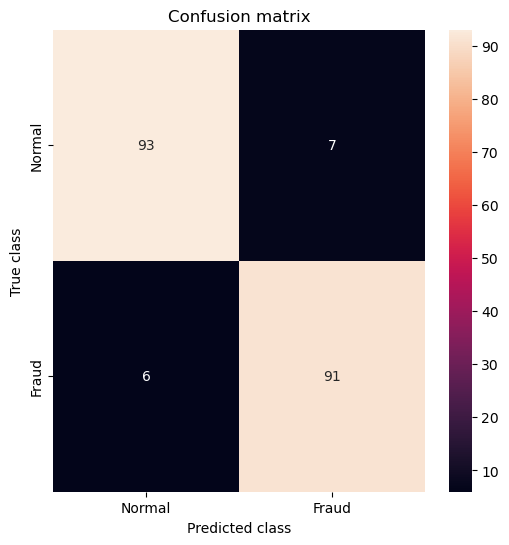

In [38]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(x_test_pred, y_test) 
plt.figure(figsize =(6, 6)) 
sbn.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class')